# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Use citipy to find the city from its latitude and longitude
from citipy import citipy

# API Key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/city_weather.csv"

#Import CSV file and read 
city_weather = pd.read_csv("../output_data/cities.csv")
city_weather.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Use zip to map the similar index of multiple containers to a single entity
lat_lng_together = zip(lats, lngs)

# Find the nearest city for each zip combo
for lat_lng in lat_lng_together:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add to cities list with no duplicate city names
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL for API Call
url=  'http://api.openweathermap.org/data/2.5/weather?' 
base_url = url + "appid" + weather_api_key

# Counter to go through data
counter = 0
recordnum= 0
setnum= 1

# Empty List
city_weather = []

# Interate through Cities and retrieve data
print('''------------------------------
City weather data Start
---------------------------------------'''

# iterate over rows in city_weather
for city in cities:
    counter= counter + 1
    
    # Condition restarting data after 50
    if (counter % 50 ==0 and count >= 50):
        recordnum = 0
        setnum += 1
    
    # Next row
    recordnum = recordnum + 1 
    
    #Printing the data and casting everything as string when necessary
    print("Retrieved Record" + str(recordcount)+ " " + "set" + " " + str(setcount) 
          + " " + ":"+  city)  
    
    query_url = base_url + "&q=" + city
    
    # Calling the API
    weather_API = requests.get(query_url).json()
 
    # Try and Except Script for cities not on the API call
    try:
      # Calling the API
      weather_API = requests.get(query_url).json() 
      
      # Pull data from API 
      lat = weather_API["coord"]["lat"]
      lng = weather_API["coord"]["lon"]
      cloud = weather_API["clouds"]["all"]
      humid = weather_API["main"]["humidity"]
      temp_max = 1.8 * (weather_API["main"]["temp_max"] - 273) + 32
      ws = weather_API["wind"]["speed"]
      country = weather_API["sys"]["country"]
      date = weather_API["dt"]
      city_name = weather_API["name"]
      
      #Append to city weather to make a table
        city_weather.append({"Max Temp" : temp_max, "Latitude" : lat, "Humidity (%)" : humid, 
                             "Cloudiness (%)" :cloud, "Longitude" : lng, "Wind Speed (mps)" : ws,
                             "Country" : country, "Date" : date, "City" : city_name})
      
      # If city is void of data skip it
      except:
        print(f"No weather data for {city}, so skipping.")


print('''------------------------------
City weather data End
---------------------------------------''')

SyntaxError: invalid syntax (<ipython-input-3-44db1d197367>, line 19)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(len(city_weather))

548


In [5]:
city_weather_df= pd.DataFrame(city_weather)
city_weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [ ]:
city_weather_df.to_csv("../output_data/WeatherData.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

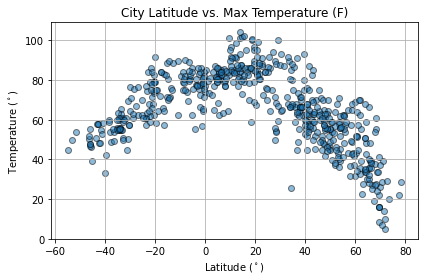

In [8]:
# Create Scatter Plots
# ($^\circ$) is for degrees symbol
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], alpha=.5, edgecolors="black", marker ="o")
plt.title(f"City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$)")
plt.grid(True) 
plt.tight_layout()

# Save figure to Images folder
plt.savefig("../Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

AttributeError: 'PathCollection' object has no property 'markers'

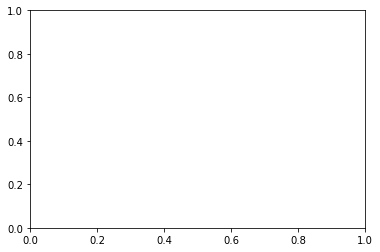

In [11]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], alpha=.5, edgecolors="black", markers= "o")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("../Images/LatvsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression